In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install -q seaborn
import seaborn as sns

In [3]:
working_dir = '/home/abalzer/Documents/github_clone/bachelor_thesis/pipeline/output/output_20250617_183139_latest_ML'
organism = 'Saccharomyces_cerevisiae'
output_file = working_dir + '/' + organism + '/' 
csv_file_path = output_file + '/feature_matrix_with_go_terms.csv'
csv_file_path_all_organisms = output_file + '/feature_matrix_with_go_terms.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path_all_organisms)

In [10]:
print(df.head(0))

Empty DataFrame
Columns: [protein_id, protein_id_human, length, Second_AA_A, Second_AA_C, Second_AA_D, Second_AA_E, Second_AA_F, Second_AA_G, Second_AA_H, Second_AA_I, Second_AA_K, Second_AA_L, Second_AA_M, Second_AA_N, Second_AA_P, Second_AA_Q, Second_AA_R, Second_AA_S, Second_AA_T, Second_AA_V, Second_AA_W, Second_AA_Y, Hydrophobicity of the second amino acid, Hydrophobicity of the third amino acid, Hydrophobicity of the fourth amino acid, Helix score of the second amino acid, Helix score of the third amino acid, Helix score of the fourth amino acid, iMet cleavage and seccond amino acid is A, Hydrophobic Moment, Charge, start_of_alpha_helix, length_of_alpha_helix, Electrostatic Help, Discrimination Factor, helix_score, Sequence, Molecular Weight, Leucine_and_Alanine_percentage, Arginine_percentage, Aromaticity, Instability Index, Isoelectric Point, SecStr_Helix, SecStr_Sheet, Hydrophobicity, GO_Term]
Index: []

[0 rows x 48 columns]


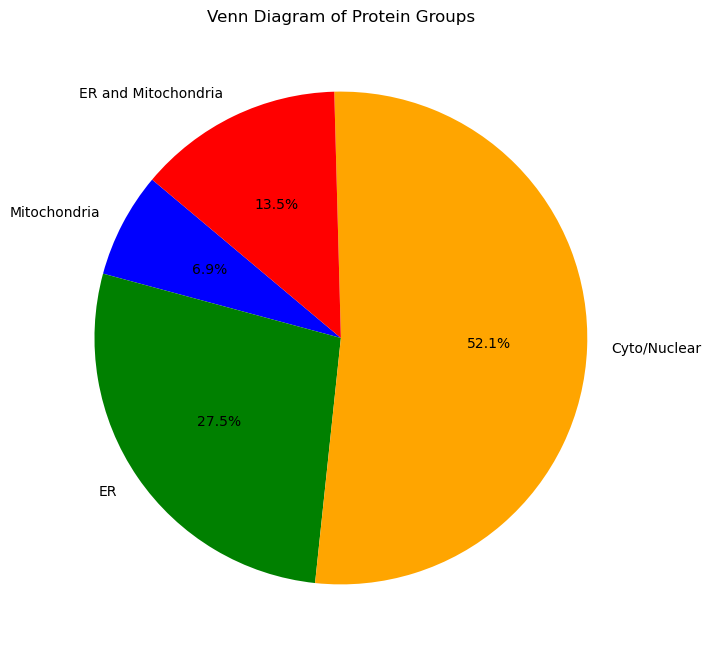

In [6]:
df_copy = df.copy()
mito_df = df_copy[(df_copy['GO_Term'] == "GO:0005739")]
er_df = df_copy[(df_copy['GO_Term'] == 'GO:0005783')]
cyto_df = df_copy[(df_copy['GO_Term'] == 'cyto_nuclear')]
multiple = df_copy[(df_copy['GO_Term'] == 'Multiple')]
# Count the unique protein IDs in each group
mito_proteins = set(mito_df['protein_id'])
er_proteins = set(er_df['protein_id'])
cyto_proteins = set(cyto_df['protein_id'])
multiple_proteins = set(multiple['protein_id'])

# Create a Venn diagram
plt.figure(figsize=(10, 8))
# Count the number of unique proteins in each group
group_counts = [len(mito_proteins), len(er_proteins), len(cyto_proteins), len(multiple_proteins)]
group_labels = ['Mitochondria', 'ER', 'Cyto/Nuclear', 'ER and Mitochondria']

# Create a pie chart
plt.pie(group_counts, labels=group_labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'orange', 'red'])
plt.title('Venn Diagram of Protein Groups')
plt.show()

/tmp/ipykernel_41939/3680325866.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er_df["Nat_Type"] = "ER"
/tmp/ipykernel_41939/3680325866.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyto_df["Nat_Type"] = "cyto_nuclear"
/tmp/ipykernel_41939/3680325866.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

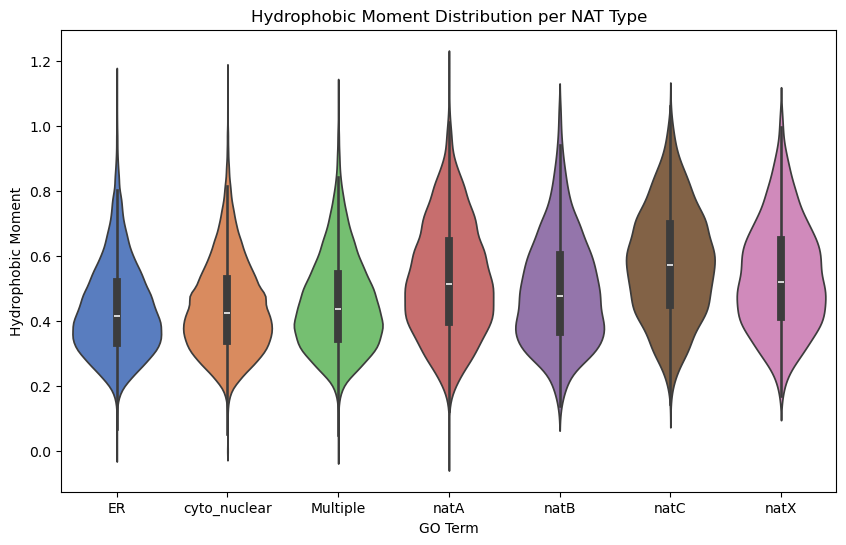

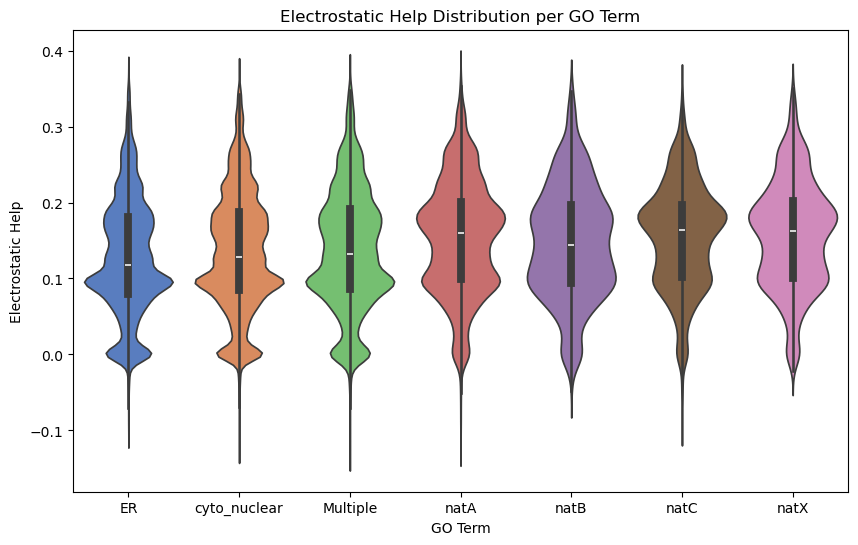

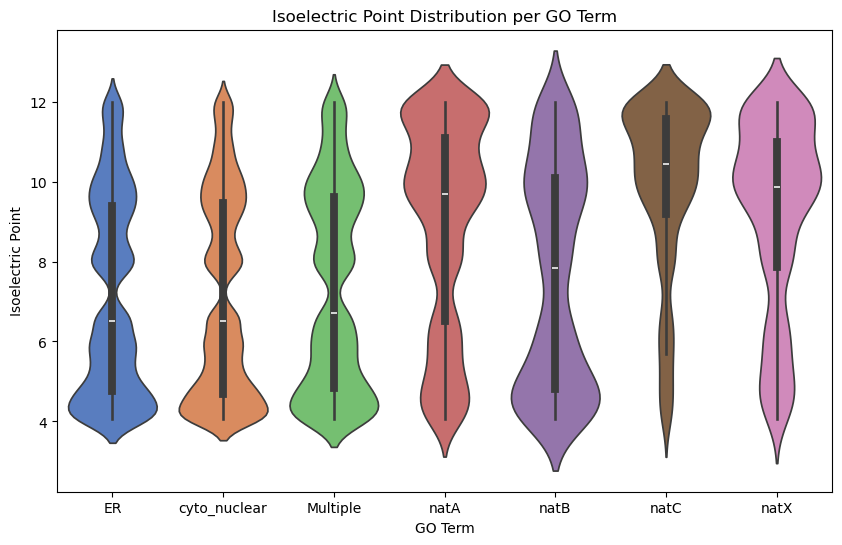

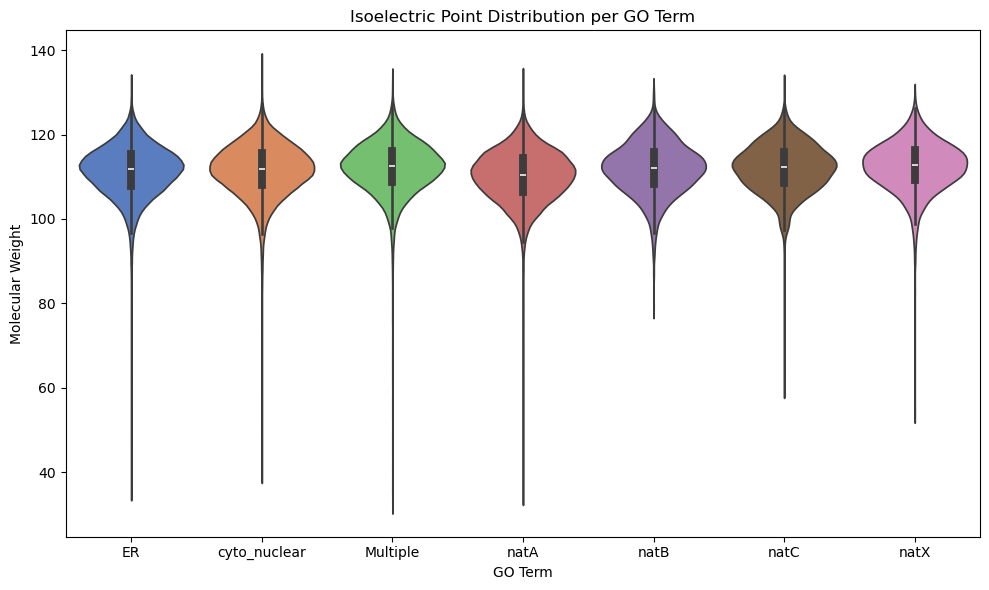

In [11]:
df_copy = df.copy()
second_aa_columns = [col for col in df_copy.columns if col.startswith("Second_AA_")]
df_copy["Second_AA"] = df_copy[second_aa_columns].idxmax(axis=1).str.replace("Second_AA_", "")
df_copy = df_copy.drop(columns=second_aa_columns)
natA = {'A', 'S', 'T', 'V', 'C', 'G'}
natC = {'L', 'I', 'F', 'W'}
natB = {'D', 'E', 'N', 'Q'}
# Add a column for nat type based on Second_AA
def get_nat_type(aa):
    if aa in natA:
        return 'natA'
    elif aa in natC:
        return 'natC'
    elif aa in natB:
        return 'natB'
    else:
        return 'natX'  # Unknown or other types

df_copy['Nat_Type'] = df_copy['Second_AA'].apply(get_nat_type)
mito_df = df_copy[(df_copy['GO_Term'] == "GO:0005739")]
er_df = df_copy[(df_copy['GO_Term'] == 'GO:0005783')]
er_df["Nat_Type"] = "ER"
cyto_df = df_copy[(df_copy['GO_Term'] == 'cyto_nuclear')]
cyto_df["Nat_Type"] = "cyto_nuclear"
multiple = df_copy[(df_copy['GO_Term'] == 'Multiple')]
multiple["Nat_Type"] = "Multiple"

# Filter the mito_df for different NAT types
NAT_NatAD = mito_df[(mito_df['Nat_Type'] == 'natA')]
NAT_NatB = mito_df[(mito_df['Nat_Type'] == 'natB')]
NAT_NatCE = mito_df[(mito_df['Nat_Type'] == 'natC')]
NAT_Other = mito_df[(mito_df['Nat_Type'] == 'natX')]

# save NAT_NatAD to a CSV file
NAT_NatAD.to_csv(output_file + 'NAT_NatAD.csv', index=False)
# save NAT_NatB to a CSV file
NAT_NatB.to_csv(output_file + 'NAT_NatB.csv', index=False)
# save NAT_NatCE to a CSV file
NAT_NatCE.to_csv(output_file + 'NAT_NatCE.csv', index=False)
# save NAT_Other to a CSV file
NAT_Other.to_csv(output_file + 'NAT_Other.csv', index=False)

# Combine mito_df and not_mito_proteins for plotting
combined_df = pd.concat([er_df, cyto_df, multiple, NAT_NatAD, NAT_NatB, NAT_NatCE, NAT_Other], ignore_index=True)

# Create a new dataframe with the NAT_Type column
nat_df = combined_df[['protein_id', 'Hydrophobic Moment', 'Electrostatic Help', 'Nat_Type', 'Isoelectric Point', 'Molecular Weight']].copy()
# Group by NAT_Type and calculate the mean for Hydrophobic_Moment and Electrostatic_Help
nat_means = nat_df.groupby('Nat_Type')[['Hydrophobic Moment', 'Electrostatic Help']].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
# Create a violin plot for Hydrophobic Moment
sns.violinplot(x=nat_df['Nat_Type'], y=nat_df['Hydrophobic Moment'], ax=ax1, palette="muted")
ax1.set_xlabel('GO Term')
ax1.set_ylabel('Hydrophobic Moment')
ax1.set_title('Hydrophobic Moment Distribution per NAT Type')

# Create a violin plot for Electrostatic Help on a new figure
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.violinplot(x=nat_df['Nat_Type'], y=nat_df['Electrostatic Help'], ax=ax2, palette="muted")
ax2.set_xlabel('GO Term')
ax2.set_ylabel('Electrostatic Help')
ax2.set_title('Electrostatic Help Distribution per GO Term')

# Create a violin plot for Isoelectric Point on a new figure
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.violinplot(x=nat_df['Nat_Type'], y=nat_df['Isoelectric Point'], ax=ax2, palette="muted")
ax2.set_xlabel('GO Term')
ax2.set_ylabel('Isoelectric Point')
ax2.set_title('Isoelectric Point Distribution per GO Term')

# Create a violin plot for Isoelectric Point on a new figure
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.violinplot(x=nat_df['Nat_Type'], y=nat_df['Molecular Weight'], ax=ax2, palette="muted")
ax2.set_xlabel('GO Term')
ax2.set_ylabel('Molecular Weight')
ax2.set_title('Isoelectric Point Distribution per GO Term')

plt.tight_layout()
plt.show()



In [ ]:
# Create a new dataframe with the NAT_Type column
nat_df = df[['protein_id', 'Hydrophobic Moment', 'Electrostatic Help', 'GO_Term', 'Isoelectric Point', 'Molecular Weight']].copy()
# Group by NAT_Type and calculate the mean for Hydrophobic_Moment and Electrostatic_Help
nat_means = nat_df.groupby('GO_Term')[['Hydrophobic Moment', 'Electrostatic Help', 'Isoelectric Point']].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
# Create a violin plot for Hydrophobic Moment
sns.violinplot(x=nat_df['GO_Term'], y=nat_df['Hydrophobic Moment'], ax=ax1, palette="muted")
ax1.set_xlabel('GO Term')
ax1.set_ylabel('Hydrophobic Moment')
ax1.set_title('Hydrophobic Moment Distribution per NAT Type')

# Create a violin plot for Electrostatic Help on a new figure
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.violinplot(x=nat_df['GO_Term'], y=nat_df['Electrostatic Help'], ax=ax2, palette="muted")
ax2.set_xlabel('GO Term')
ax2.set_ylabel('Electrostatic Help')
ax2.set_title('Electrostatic Help Distribution per GO Term')

fig, ax2 = plt.subplots(figsize=(10, 6))
sns.violinplot(x=nat_df['GO_Term'], y=nat_df['Isoelectric Point'], ax=ax2, palette="muted")
ax2.set_xlabel('GO Term')
ax2.set_ylabel('Isoelectric Point')
ax2.set_title('Isoelectric Point Distribution per GO Term')

plt.tight_layout()
plt.show()



In [ ]:
from scipy.stats import ttest_ind

# Optional: GO-Terme auswählen (z. B. Mitochondrium vs. cyto_nuclear)
group1 = 'natB'  # Mitochondrion
group2 = 'cyto_nuclear'  # referenz

# Filter Daten
group1_data = nat_df[nat_df['Nat_Type'] == group1]['Hydrophobic Moment'].dropna()
group2_data = nat_df[nat_df['Nat_Type'] == group2]['Hydrophobic Moment'].dropna()
print(f"Group 1 ({group1}) size: {len(group1_data)}")
print(f"Group 2 ({group2}) size: {len(group2_data)}")
# T-Test für Hydrophobic Moment
t_stat_hydro, p_val_hydro = ttest_ind(group1_data, group2_data, equal_var=True)  # Welch’s t-test
print(f"Hydrophobic Moment t-test ({group1} vs {group2}): t={t_stat_hydro:.3f}, p={p_val_hydro:.4f}")

# Dasselbe für Electrostatic Help
group1_electro = nat_df[nat_df['Nat_Type'] == group1]['Electrostatic Help'].dropna()
group2_electro = nat_df[nat_df['Nat_Type'] == group2]['Electrostatic Help'].dropna()

t_stat_elec, p_val_elec = ttest_ind(group1_electro, group2_electro, equal_var=True)
print(f"Electrostatic Help t-test ({group1} vs {group2}): t={t_stat_elec:.3f}, p={p_val_elec:.4f}")

# Dasselbe für Isoelectric Point
group1_weight = nat_df[nat_df['Nat_Type'] == group1]['Isoelectric Point'].dropna()
group2_weight = nat_df[nat_df['Nat_Type'] == group2]['Isoelectric Point'].dropna()

t_stat_weight, p_val_weight = ttest_ind(group1_weight, group2_weight, equal_var=True)
print(f"Isoelectric Point t-test ({group1} vs {group2}): t={t_stat_weight:.3f}, p={p_val_weight:.4f}")

# Dasselbe für Molecular Weight
group1_weight = nat_df[nat_df['Nat_Type'] == group1]['Molecular Weight'].dropna()
group2_weight = nat_df[nat_df['Nat_Type'] == group2]['Molecular Weight'].dropna()

t_stat_weight, p_val_weight = ttest_ind(group1_weight, group2_weight, equal_var=True)
print(f"Molecular Weight t-test ({group1} vs {group2}): t={t_stat_weight:.3f}, p={p_val_weight:.4f}")


In [ ]:
mito_df = df.copy()
mito_df = mito_df[(mito_df['GO_Term'] == "GO:0005739")]
sequence = mito_df['Sequence']
start_of_alpha_helix = mito_df['start_of_alpha_helix']
length_of_alpha_helix = mito_df['length_of_alpha_helix']
end_of_alpha_helix = start_of_alpha_helix + length_of_alpha_helix - 1
mito_df['end_of_alpha_helix'] = end_of_alpha_helix
# Count how often each position is part of an alpha helix
sequence_length = sequence.str.len().max()
position_counts = [0] * sequence_length
start_counts = [0] * sequence_length
end_counts = [0] * sequence_length

for start, end in zip(start_of_alpha_helix, end_of_alpha_helix):
    for pos in range(start, end + 1):
        if pos < sequence_length:
            position_counts[pos] += 1
    if start < sequence_length:
        start_counts[start] += 1
    if end < sequence_length:
        end_counts[end] += 1

# Plot the data
plt.figure(figsize=(12, 6))
positions = range(sequence_length)

# Blue histogram for positions part of an alpha helix
plt.bar(positions, position_counts, color='blue', alpha=0.6, label='Part of Alpha Helix')

# Green scatter plot for start of alpha helix
plt.scatter(positions, start_counts, color='green', label='Start of Alpha Helix')

# Red scatter plot for end of alpha helix
plt.scatter(positions, end_counts, color='red', label='End of Alpha Helix')

plt.xlabel('Position in Sequence')
plt.ylabel('Frequency')
plt.title('Alpha Helix Position Analysis')
plt.legend()
plt.tight_layout()
plt.show()